# Introduction: This research investigates the factors motivating people to volunteer in their communities. A survey was conducted to collect data on various motivational aspects, including social, personal, and career-related reasons for volunteering.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [2]:
df = pd.read_csv(r'D:\4th semester\RTT\Motivation Behind Volunteer (Responses) - Form responses 1.csv')

In [3]:
df.head()

,Timestamp,Age,Gender,Employment status,Education,I volunteer because I want to help others.,I believe volunteering makes a positive impact on society.,Volunteering helps me build social networks.,Volunteering provides me with opportunities to learn new skills.,I volunteer to enhance my career prospects.,Volunteering gives me a sense of belonging.\n,Receiving awards or appreciation motivates me to volunteer.,What type of volunteer work do you prefer? (Select all that apply),I volunteer to meet new people.,Volunteering experience (years)
0,20/11/2024 13:41:44,18-24,Female,Student,High school or less,3.0,2,1.0,3,2,2.0,2.0,"Environmental, Education, Animal Welfare",1.0,Less than 1 year
1,20/11/2024 14:24:53,18-24,Female,Student,Some college,5.0,5,5.0,3,3,5.0,3.0,Social Services,3.0,More than 5 years
2,20/11/2024 14:39:49,18-24,Female,Student,Bachelor’s degree,4.0,5,5.0,5,5,5.0,5.0,Social Services,3.0,1-2 years
3,20/11/2024 19:10:52,18-24,Female,Student,Bachelor’s degree,4.0,4,5.0,5,5,4.0,5.0,Education,4.0,1-2 years
4,20/11/2024 19:18:13,18-24,Female,Student,Bachelor’s degree,NaN,3,4.0,4,2,3.0,4.0,"Environmental, Health, Animal Welfare",3.0,Less than 1 year


In [ ]:
#timestamp to datetime
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

C:\Users\DELL\AppData\Local\Temp\ipykernel_19004\3458541947.py:2: UserWarning: Parsing dates in %d/%m/%Y %H:%M:%S format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Timestamp'] = pd.to_datetime(df['Timestamp'])


In [5]:
df.dropna()

,Timestamp,Age,Gender,Employment status,Education,I volunteer because I want to help others.,I believe volunteering makes a positive impact on society.,Volunteering helps me build social networks.,Volunteering provides me with opportunities to learn new skills.,I volunteer to enhance my career prospects.,Volunteering gives me a sense of belonging.\n,Receiving awards or appreciation motivates me to volunteer.,What type of volunteer work do you prefer? (Select all that apply),I volunteer to meet new people.,Volunteering experience (years)
0,2024-11-20 13:41:44,18-24,Female,Student,High school or less,3.0,2,1.0,3,2,2.0,2.0,"Environmental, Education, Animal Welfare",1.0,Less than 1 year
1,2024-11-20 14:24:53,18-24,Female,Student,Some college,5.0,5,5.0,3,3,5.0,3.0,Social Services,3.0,More than 5 years
2,2024-11-20 14:39:49,18-24,Female,Student,Bachelor’s degree,4.0,5,5.0,5,5,5.0,5.0,Social Services,3.0,1-2 years
3,2024-11-20 19:10:52,18-24,Female,Student,Bachelor’s degree,4.0,4,5.0,5,5,4.0,5.0,Education,4.0,1-2 years
5,2024-11-20 19:37:07,18-24,Female,Student,Bachelor’s degree,5.0,5,1.0,3,1,3.0,1.0,"Environmental, Social Services, Health, Educat...",3.0,1-2 years
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,2024-11-29 18:02:53,25-34,Female,Employed full-time,Bachelor’s degree,3.0,2,4.0,4,4,4.0,2.0,Education,1.0,Less than 1 year
116,2024-12-22 00:03:51,18-24,Male,Employed full-time,Master’s degree,5.0,5,4.0,4,3,5.0,5.0,Social Services,5.0,3-5 years
117,2024-12-22 00:04:37,18-24,Male,Student,Bachelor’s degree,5.0,5,5.0,4,4,4.0,4.0,Social Services,5.0,1-2 years
118,2024-12-22 00:05:16,35-44,Male,Employed full-time,Bachelor’s degree,5.0,5,5.0,5,2,4.0,3.0,Social Services,2.0,3-5 years


In [6]:
# missing values
df.isnull().sum()
#drop missing values (fill with mean or mode, depending on the column type)
df['I volunteer because I want to help others.'].fillna(df['I volunteer because I want to help others.'].mode()[0], inplace=True)
df['Receiving awards or appreciation motivates me to volunteer.'].fillna(df['Receiving awards or appreciation motivates me to volunteer.'].mode()[0], inplace=True)
# Repeat for other columns with missing values


C:\Users\DELL\AppData\Local\Temp\ipykernel_19004\4171546279.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['I volunteer because I want to help others.'].fillna(df['I volunteer because I want to help others.'].mode()[0], inplace=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_19004\4171546279.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the interm

In [7]:
df.isnull().sum()

Timestamp                                                             0
Age                                                                   0
Gender                                                                0
Employment status                                                     0
Education                                                             0
I volunteer because I want to help others.                            0
I believe volunteering makes a positive impact on society.            0
Volunteering helps me build social networks.                          1
Volunteering provides me with opportunities to learn new skills.      0
I volunteer to enhance my career prospects.                           0
Volunteering gives me a sense of belonging.\n                         1
Receiving awards or appreciation motivates me to volunteer.           0
What type of volunteer work do you prefer? (Select all that apply)    2
I volunteer to meet new people.                                 

In [8]:
df.std(numeric_only=True)

I volunteer because I want to help others.                          1.460122
I believe volunteering makes a positive impact on society.          1.430916
Volunteering helps me build social networks.                        1.379903
Volunteering provides me with opportunities to learn new skills.    1.330351
I volunteer to enhance my career prospects.                         1.377355
Volunteering gives me a sense of belonging.\n                       1.397376
Receiving awards or appreciation motivates me to volunteer.         1.431157
I volunteer to meet new people.                                     1.421228
dtype: float64

In [9]:
#mean
print("Mean:\n", df.mean(numeric_only=True))
#median
print("Median:\n", df.median(numeric_only=True))

Mean:
 I volunteer because I want to help others.                          3.793388
I believe volunteering makes a positive impact on society.          3.950413
Volunteering helps me build social networks.                        3.808333
Volunteering provides me with opportunities to learn new skills.    3.884298
I volunteer to enhance my career prospects.                         3.570248
Volunteering gives me a sense of belonging.\n                       3.616667
Receiving awards or appreciation motivates me to volunteer.         3.438017
I volunteer to meet new people.                                     3.283333
dtype: float64
Median:
 I volunteer because I want to help others.                          4.0
I believe volunteering makes a positive impact on society.          5.0
Volunteering helps me build social networks.                        4.0
Volunteering provides me with opportunities to learn new skills.    4.0
I volunteer to enhance my career prospects.                      

In [10]:
# mode
print("Mode:\n", df.mode().iloc[0]) 

Mode:
 Timestamp                                                             2024-11-27 23:01:14
Age                                                                                 18-24
Gender                                                                             Female
Employment status                                                                 Student
Education                                                               Bachelor’s degree
I volunteer because I want to help others.                                            5.0
I believe volunteering makes a positive impact on society.                              5
Volunteering helps me build social networks.                                          5.0
Volunteering provides me with opportunities to learn new skills.                        5
I volunteer to enhance my career prospects.                                             5
Volunteering gives me a sense of belonging.\n                                         5.0
Rec

In [11]:
df.columns

Index(['Timestamp', 'Age', 'Gender', 'Employment status', 'Education ',
       'I volunteer because I want to help others.',
       'I believe volunteering makes a positive impact on society.',
       'Volunteering helps me build social networks.',
       'Volunteering provides me with opportunities to learn new skills.',
       'I volunteer to enhance my career prospects.',
       'Volunteering gives me a sense of belonging.\n',
       'Receiving awards or appreciation motivates me to volunteer.',
       'What type of volunteer work do you prefer? (Select all that apply)',
       'I volunteer to meet new people.', 'Volunteering experience (years)'],
      dtype='object')

In [12]:
#categorical columns to category types
df['Age'] = df['Age'].astype('category').cat.codes
df['Gender'] = df['Gender'].astype('category').cat.codes
df['Employment status'] = df['Employment status'].astype('category').cat.codes
df['Education '] = df['Education '].astype('category').cat.codes


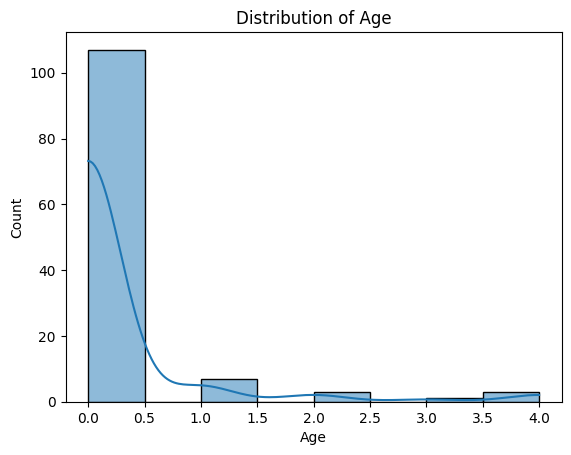

In [13]:
# Distribution of Age
sns.histplot(df['Age'], kde=True)
plt.title('Distribution of Age')
plt.show()

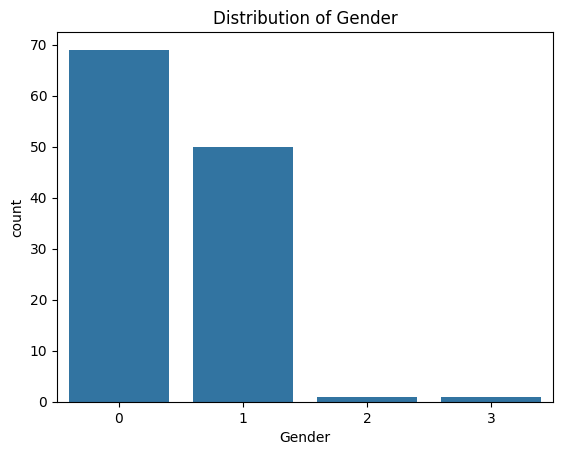

In [14]:
# Distribution of Gender
sns.countplot(x='Gender', data=df)
plt.title('Distribution of Gender')
plt.show()

Non-numeric columns: Index(['Timestamp',
       'What type of volunteer work do you prefer? (Select all that apply)',
       'Volunteering experience (years)'],
      dtype='object')


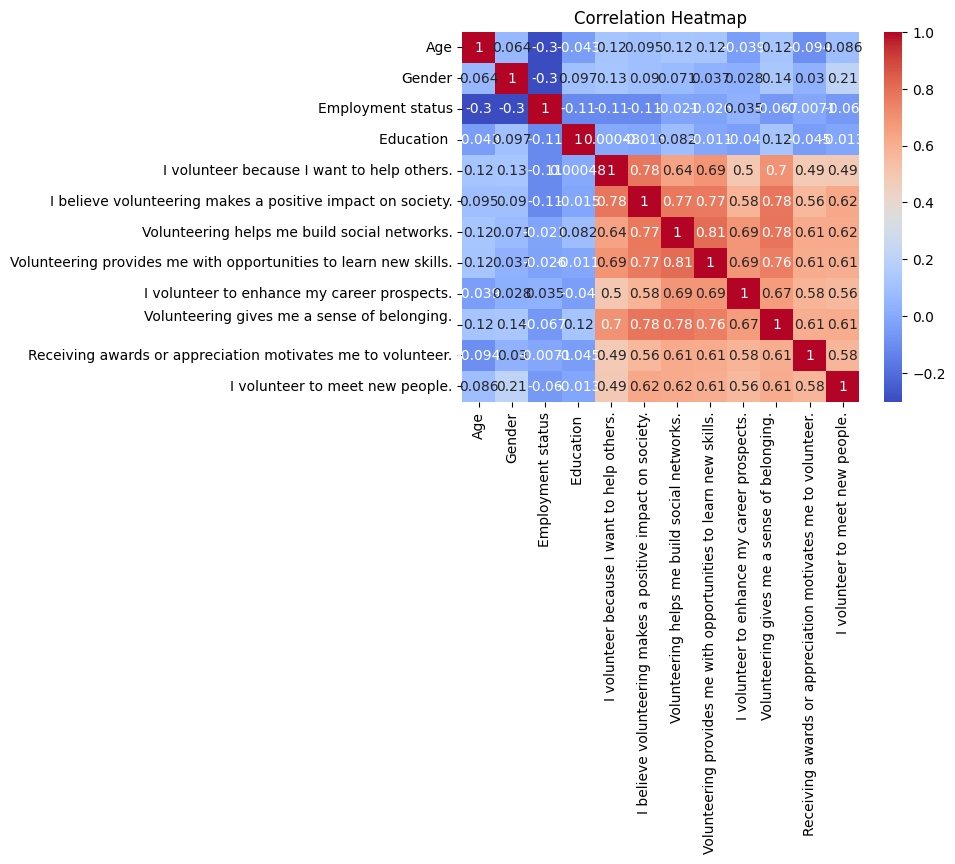

In [15]:
#columns with non-numeric data types
non_numeric_columns = df.select_dtypes(exclude=[np.number]).columns
print("Non-numeric columns:", non_numeric_columns)

# Drop non-numeric columns for correlation calculation
df_numeric = df.drop(columns=non_numeric_columns)

# Now calculate the correlation matrix only for numeric columns
correlation_matrix = df_numeric.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [16]:
df.dtypes

Timestamp                                                             datetime64[ns]
Age                                                                             int8
Gender                                                                          int8
Employment status                                                               int8
Education                                                                       int8
I volunteer because I want to help others.                                   float64
I believe volunteering makes a positive impact on society.                     int64
Volunteering helps me build social networks.                                 float64
Volunteering provides me with opportunities to learn new skills.               int64
I volunteer to enhance my career prospects.                                    int64
Volunteering gives me a sense of belonging.\n                                float64
Receiving awards or appreciation motivates me to volunteer.      

In [17]:
# 1. Convert 'Timestamp' to datetime if it's not already in datetime format
df['Timestamp'] = pd.to_datetime(df['Timestamp'], errors='coerce')

# 2. Convert motivational factors to float (consistent type)
motivation_columns = [
    'I volunteer because I want to help others.',
    'I believe volunteering makes a positive impact on society.',
    'Volunteering helps me build social networks.',
    'Volunteering provides me with opportunities to learn new skills.',
    'I volunteer to enhance my career prospects.',
    'Volunteering gives me a sense of belonging.\n',
    'Receiving awards or appreciation motivates me to volunteer.',
    'I volunteer to meet new people.'
]

# Convert to float64 for consistency
df[motivation_columns] = df[motivation_columns].astype('float64')

# 4. Convert 'Volunteering experience (years)' to a categorical column
experience_mapping = {
    'Less than 1 year': 0,
    '1-2 years': 1,
    '3-5 years': 2,
    'More than 5 years': 3
}

df['Volunteering experience (years)'] = df['Volunteering experience (years)'].map(experience_mapping)

# 5. Ensure categorical columns like 'Age', 'Gender', 'Employment status', 'Education' are integers (already done, but you can check)
df['Age'] = df['Age'].astype('int8')
df['Gender'] = df['Gender'].astype('int8')
df['Employment status'] = df['Employment status'].astype('int8')
df['Education '] = df['Education '].astype('int8')

# Verify the updated data types
df.dtypes

Timestamp                                                             datetime64[ns]
Age                                                                             int8
Gender                                                                          int8
Employment status                                                               int8
Education                                                                       int8
I volunteer because I want to help others.                                   float64
I believe volunteering makes a positive impact on society.                   float64
Volunteering helps me build social networks.                                 float64
Volunteering provides me with opportunities to learn new skills.             float64
I volunteer to enhance my career prospects.                                  float64
Volunteering gives me a sense of belonging.\n                                float64
Receiving awards or appreciation motivates me to volunteer.      

In [18]:
# Descriptive statistics for all numerical variables
df.describe()

,Timestamp,Age,Gender,Employment status,Education,I volunteer because I want to help others.,I believe volunteering makes a positive impact on society.,Volunteering helps me build social networks.,Volunteering provides me with opportunities to learn new skills.,I volunteer to enhance my career prospects.,Volunteering gives me a sense of belonging.\n,Receiving awards or appreciation motivates me to volunteer.,I volunteer to meet new people.,Volunteering experience (years)
count,121,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,120.000000,121.000000,121.000000,120.000000,121.000000,120.000000,120.000000
mean,2024-11-26 12:01:58.512396288,0.231405,0.454545,2.644628,1.363636,3.793388,3.950413,3.808333,3.884298,3.570248,3.616667,3.438017,3.283333,0.591667
min,2024-11-20 13:41:44,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,2024-11-21 23:43:15,0.000000,0.000000,3.000000,1.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,2.000000,2.000000,0.000000
50%,2024-11-25 21:24:59,0.000000,0.000000,3.000000,1.000000,4.000000,5.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,0.000000
75%,2024-11-27 23:13:47,0.000000,1.000000,3.000000,1.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1.000000
max,2024-12-22 00:08:03,4.000000,3.000000,4.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,3.000000
std,NaN,0.761143,0.562731,0.956203,1.072381,1.460122,1.430916,1.379903,1.330351,1.377355,1.397376,1.431157,1.421228,0.845113


In [20]:
print(df.columns.tolist())

['Timestamp', 'Age', 'Gender', 'Employment status', 'Education ', 'I volunteer because I want to help others.', 'I believe volunteering makes a positive impact on society.', 'Volunteering helps me build social networks.', 'Volunteering provides me with opportunities to learn new skills.', 'I volunteer to enhance my career prospects.', 'Volunteering gives me a sense of belonging.\n', 'Receiving awards or appreciation motivates me to volunteer.', 'What type of volunteer work do you prefer? (Select all that apply)', 'I volunteer to meet new people.', 'Volunteering experience (years)']


In [21]:
df.columns = df.columns.str.strip() 

In [22]:
motivational_columns = [
    'I volunteer because I want to help others.',
    'I believe volunteering makes a positive impact on society.',
    'Volunteering helps me build social networks.',
    'Volunteering provides me with opportunities to learn new skills.',
    'I volunteer to enhance my career prospects.',
    'Volunteering gives me a sense of belonging.',  # Now this should match
    'Receiving awards or appreciation motivates me to volunteer.',
    'I volunteer to meet new people.'
]

scaled_data = scaler.fit_transform(df[motivational_columns])

C:\Users\DELL\AppData\Local\Temp\ipykernel_19004\2786322830.py:10: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df = df.apply(pd.to_numeric, errors='ignore')  # Ensure numerical columns are recognized as numeric


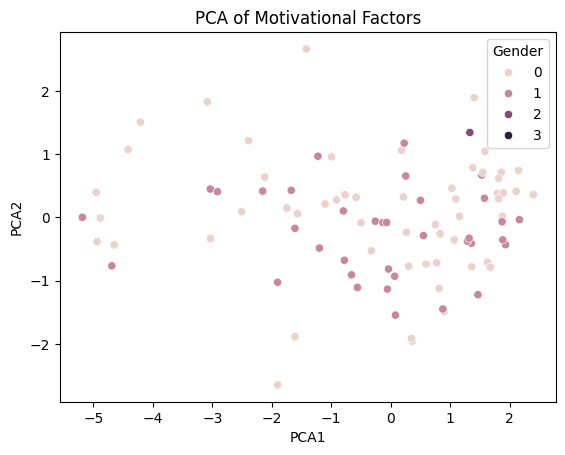

Explained variance ratio: [0.71983486 0.08924085]


In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

# Fill missing values (you can adjust this based on your requirements)
df.fillna(df.mode().iloc[0], inplace=True)  # For categorical columns
df = df.apply(pd.to_numeric, errors='ignore')  # Ensure numerical columns are recognized as numeric

# Encode categorical columns into numerical values
label_encoder = LabelEncoder()

# Columns with categorical data to encode
categorical_columns = ['Gender', 'Education', 'What type of volunteer work do you prefer? (Select all that apply)']


# Select the motivational factors for PCA
motivational_columns = ['I volunteer because I want to help others.',
                        'I believe volunteering makes a positive impact on society.',
                        'Volunteering helps me build social networks.',
                        'Volunteering provides me with opportunities to learn new skills.',
                        'I volunteer to enhance my career prospects.',
                        'Volunteering gives me a sense of belonging.',
                        'Receiving awards or appreciation motivates me to volunteer.']

# Standardize the data (important for PCA)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[motivational_columns])

# Apply PCA to reduce dimensions
pca = PCA(n_components=2)  # Reduce to 2 components for visualization
pca_result = pca.fit_transform(scaled_data)

# Add PCA results to the dataframe
df['PCA1'] = pca_result[:, 0]
df['PCA2'] = pca_result[:, 1]

# Plot the PCA results
sns.scatterplot(x='PCA1', y='PCA2', hue=df['Gender'], data=df)
plt.title('PCA of Motivational Factors')
plt.show()

# Check explained variance to understand how much information each component captures
print(f"Explained variance ratio: {pca.explained_variance_ratio_}")

In [24]:
df.columns

Index(['Timestamp', 'Age', 'Gender', 'Employment status', 'Education',
       'I volunteer because I want to help others.',
       'I believe volunteering makes a positive impact on society.',
       'Volunteering helps me build social networks.',
       'Volunteering provides me with opportunities to learn new skills.',
       'I volunteer to enhance my career prospects.',
       'Volunteering gives me a sense of belonging.',
       'Receiving awards or appreciation motivates me to volunteer.',
       'What type of volunteer work do you prefer? (Select all that apply)',
       'I volunteer to meet new people.', 'Volunteering experience (years)',
       'PCA1', 'PCA2'],
      dtype='object')

In [27]:
df.columns

Index(['Timestamp', 'Age', 'Gender', 'Employment status', 'Education',
       'I volunteer because I want to help others.',
       'I believe volunteering makes a positive impact on society.',
       'Volunteering helps me build social networks.',
       'Volunteering provides me with opportunities to learn new skills.',
       'I volunteer to enhance my career prospects.',
       'Volunteering gives me a sense of belonging.',
       'Receiving awards or appreciation motivates me to volunteer.',
       'What type of volunteer work do you prefer? (Select all that apply)',
       'I volunteer to meet new people.', 'Volunteering experience (years)',
       'PCA1', 'PCA2'],
      dtype='object')

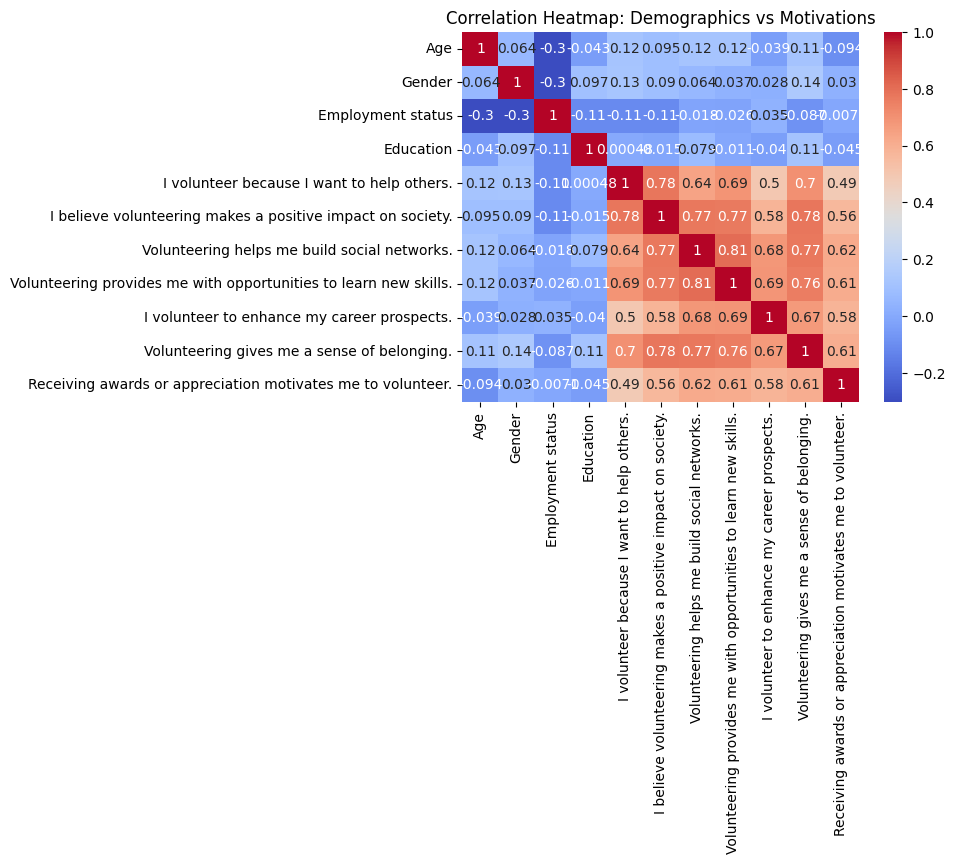

In [29]:
# Correlation between motivational columns and demographics (e.g., Age, Gender)
demographics_columns = ['Age', 'Gender', 'Employment status', 'Education']
motivation_columns = [
    'I volunteer because I want to help others.',
    'I believe volunteering makes a positive impact on society.',
    'Volunteering helps me build social networks.',
    'Volunteering provides me with opportunities to learn new skills.',
    'I volunteer to enhance my career prospects.',
    'Volunteering gives me a sense of belonging.',
    'Receiving awards or appreciation motivates me to volunteer.'
]

# Compute correlations
correlation_results = df[demographics_columns + motivation_columns].corr()

# Plot heatmap of correlations
sns.heatmap(correlation_results, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap: Demographics vs Motivations')
plt.show()

In [30]:
# Define a function to calculate Cronbach's alpha
def cronbach_alpha(data):
    item_variances = data.var(axis=0, ddof=1)
    total_variance = data.sum(axis=1).var(ddof=1)
    return len(data.columns) / (len(data.columns) - 1) * (1 - item_variances.sum() / total_variance)

# Calculate Cronbach's alpha for motivational factors
motivational_data = df[motivation_columns]
alpha = cronbach_alpha(motivational_data)
print(f"Cronbach's Alpha for motivational factors: {alpha}")

Cronbach's Alpha for motivational factors: 0.9334767959699617


In [31]:
# Strip any leading/trailing spaces in column names
df.columns = df.columns.str.strip()

In [32]:
df.columns

Index(['Timestamp', 'Age', 'Gender', 'Employment status', 'Education',
       'I volunteer because I want to help others.',
       'I believe volunteering makes a positive impact on society.',
       'Volunteering helps me build social networks.',
       'Volunteering provides me with opportunities to learn new skills.',
       'I volunteer to enhance my career prospects.',
       'Volunteering gives me a sense of belonging.',
       'Receiving awards or appreciation motivates me to volunteer.',
       'What type of volunteer work do you prefer? (Select all that apply)',
       'I volunteer to meet new people.', 'Volunteering experience (years)',
       'PCA1', 'PCA2'],
      dtype='object')

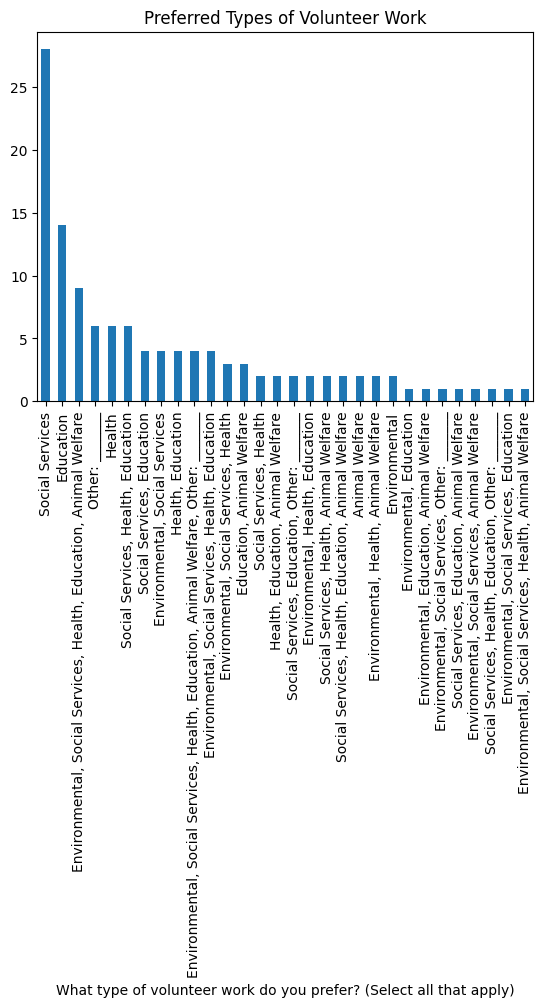

In [33]:
# Count and plot preferred types of volunteer work
volunteer_work_preferences = df['What type of volunteer work do you prefer? (Select all that apply)'].value_counts()
volunteer_work_preferences.plot(kind='bar')
plt.title('Preferred Types of Volunteer Work')
plt.show()

In [34]:
# 3. Convert 'What type of volunteer work do you prefer?' to binary columns
# For example, if the choices are 'Environmental', 'Education', etc., create dummy variables
volunteer_work_columns = df['What type of volunteer work do you prefer? (Select all that apply)'].str.get_dummies(sep=',')
df = pd.concat([df, volunteer_work_columns], axis=1)

In [35]:
df.fillna(df.mode().iloc[0], inplace=True)  # For categorical missing values
df.describe() 

,Timestamp,Age,Gender,Employment status,Education,I volunteer because I want to help others.,I believe volunteering makes a positive impact on society.,Volunteering helps me build social networks.,Volunteering provides me with opportunities to learn new skills.,I volunteer to enhance my career prospects.,...,Education,Health,Other: _______,Social Services,Animal Welfare,Education,Environmental,Health,Other: _______,Social Services
count,1.210000e+02,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,...,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000
mean,1.732623e+18,0.231405,0.454545,2.644628,1.363636,3.793388,3.950413,3.818182,3.884298,3.570248,...,0.363636,0.314050,0.066116,0.231405,0.016529,0.140496,0.297521,0.099174,0.049587,0.396694
std,5.160262e+14,0.761143,0.562731,0.956203,1.072381,1.460122,1.430916,1.378405,1.330351,1.377355,...,0.483046,0.466066,0.249517,0.423484,0.128028,0.348946,0.459068,0.300138,0.217992,0.491246
min,1.732110e+18,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.732233e+18,0.000000,0.000000,3.000000,1.000000,3.000000,3.000000,3.000000,3.000000,3.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.732570e+18,0.000000,0.000000,3.000000,1.000000,4.000000,5.000000,4.000000,4.000000,4.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.732749e+18,0.000000,1.000000,3.000000,1.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000
max,1.734826e+18,4.000000,3.000000,4.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


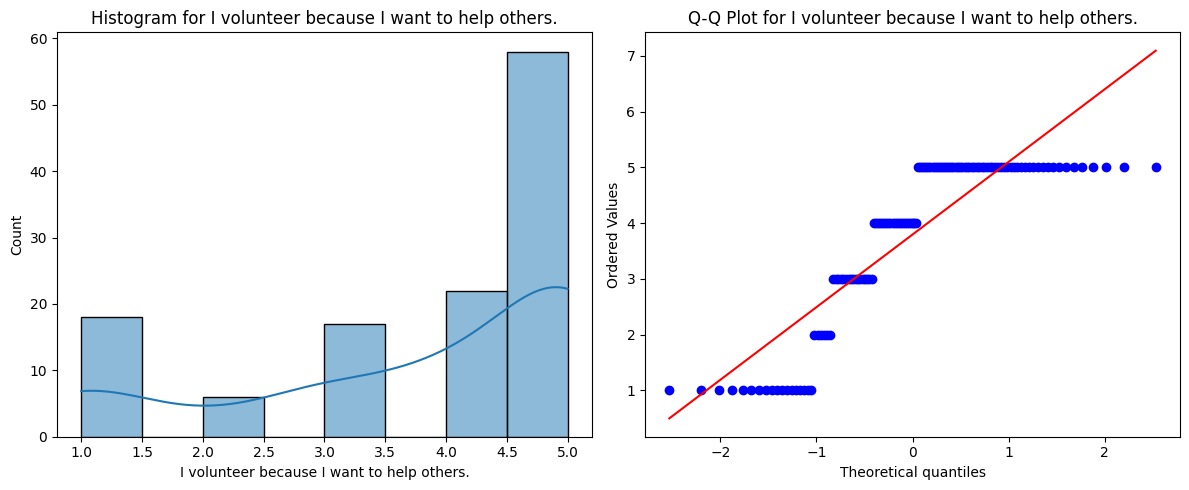

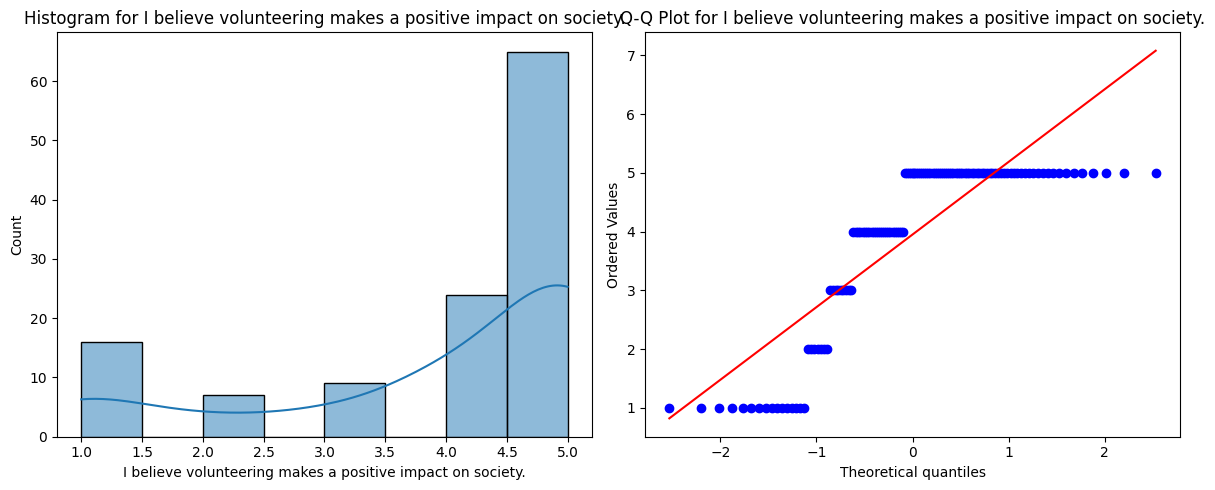

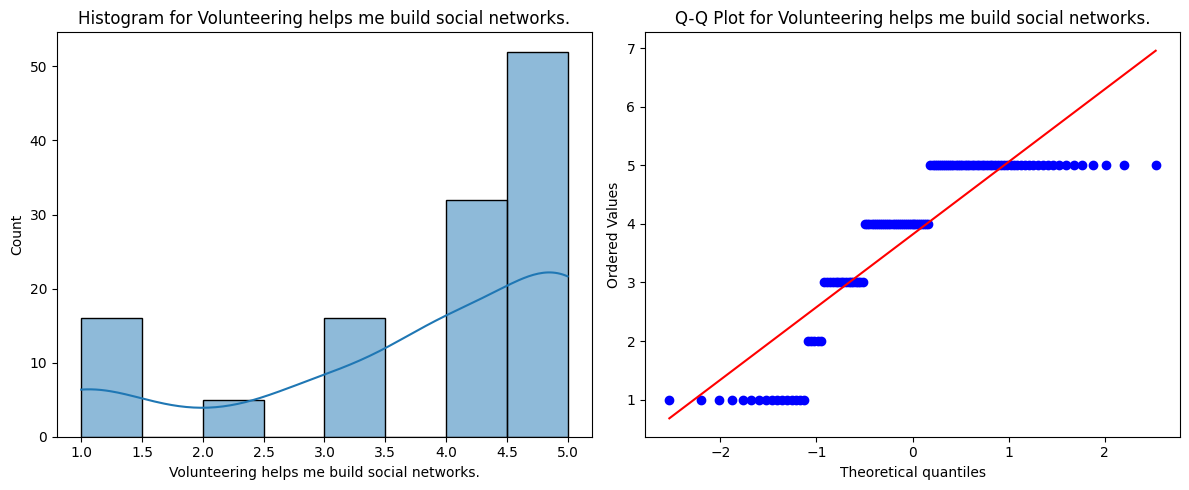

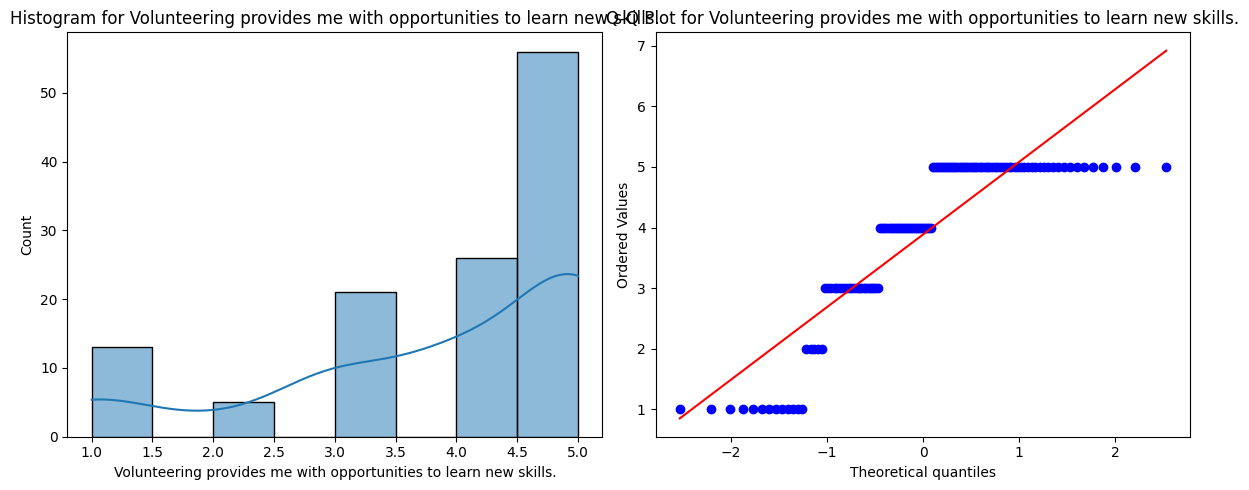

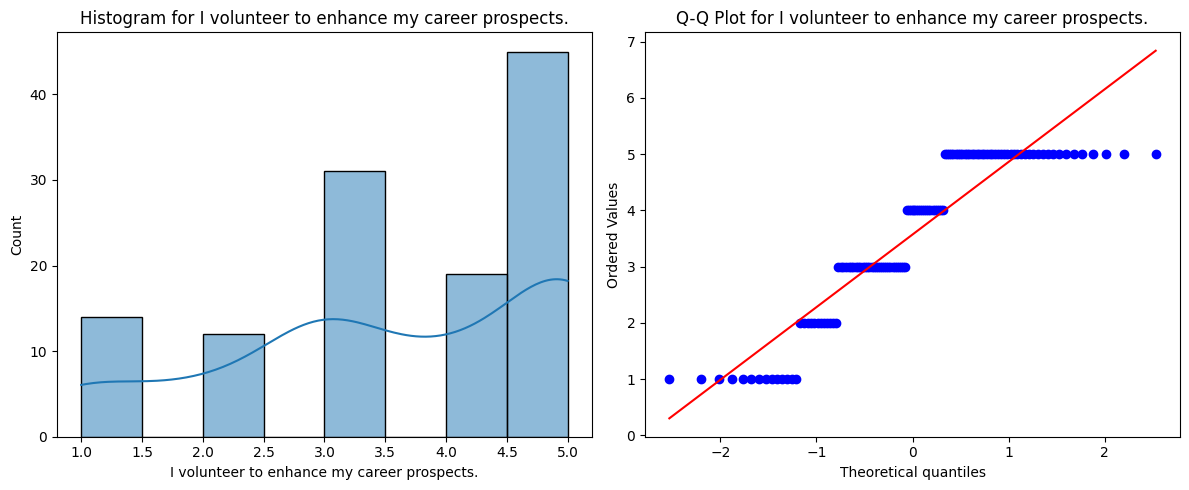

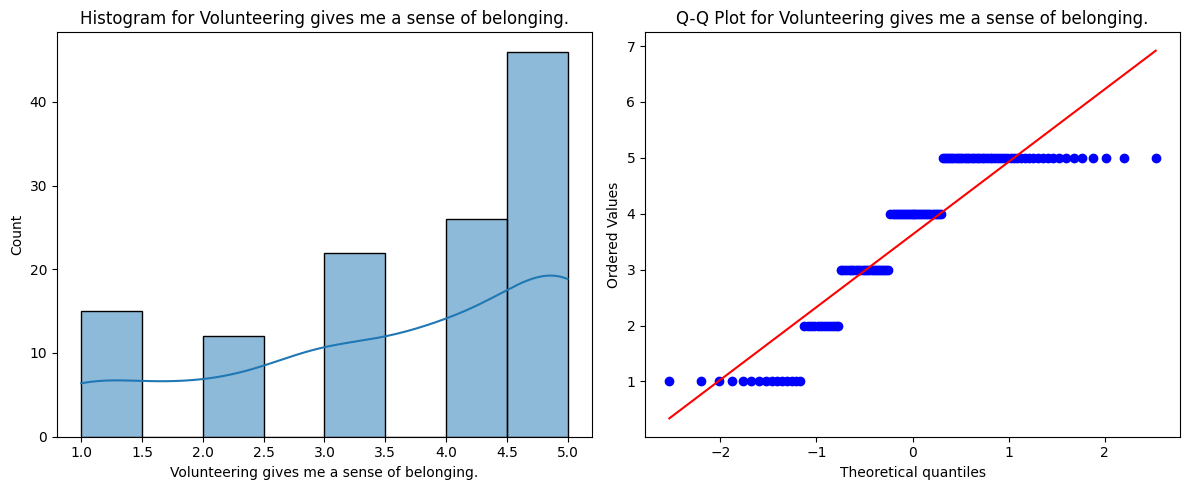

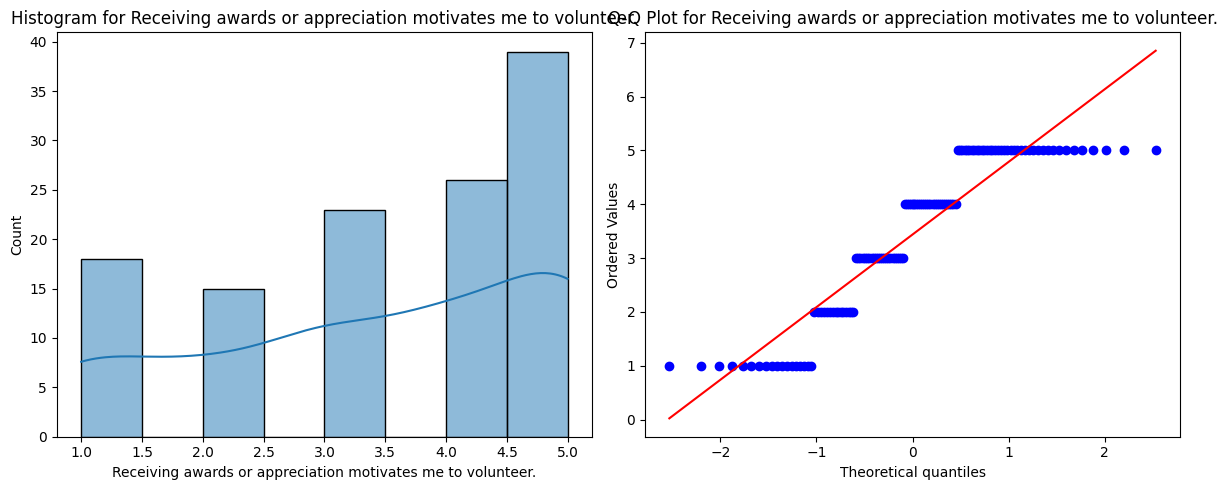

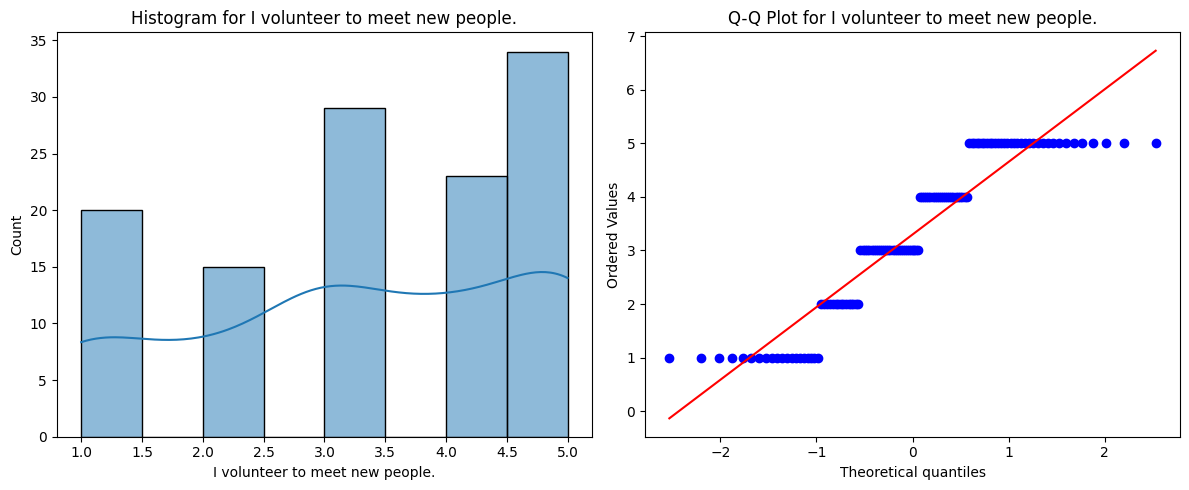

Outliers based on Z-scores:
 I volunteer because I want to help others.                          0
I believe volunteering makes a positive impact on society.          0
Volunteering helps me build social networks.                        0
Volunteering provides me with opportunities to learn new skills.    0
I volunteer to enhance my career prospects.                         0
Volunteering gives me a sense of belonging.                         0
Receiving awards or appreciation motivates me to volunteer.         0
I volunteer to meet new people.                                     0
dtype: int64

Outliers based on IQR method:
 I volunteer because I want to help others.                          0
I believe volunteering makes a positive impact on society.          0
Volunteering helps me build social networks.                        0
Volunteering provides me with opportunities to learn new skills.    0
I volunteer to enhance my career prospects.                         0
Volunteering giv

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import shapiro

# Select only the relevant columns (numerical columns) for normality and outlier checking
cols = [
    'I volunteer because I want to help others.',
    'I believe volunteering makes a positive impact on society.',
    'Volunteering helps me build social networks.',
    'Volunteering provides me with opportunities to learn new skills.',
    'I volunteer to enhance my career prospects.',
    'Volunteering gives me a sense of belonging.',
    'Receiving awards or appreciation motivates me to volunteer.',
    'I volunteer to meet new people.'
]

# Filter the dataframe to only include the relevant columns
df_selected = df[cols]

# Checking normality using Shapiro-Wilk Test and visualizing with histograms and Q-Q plots
normality_results = {}
for column in df_selected.columns:
    # Shapiro-Wilk Test
    stat, p_value = shapiro(df_selected[column].dropna())  # dropna to handle missing values
    normality_results[column] = p_value
    
    # Plotting Histogram and Q-Q Plot
    plt.figure(figsize=(12, 5))
    
    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df_selected[column], kde=True)
    plt.title(f'Histogram for {column}')
    
    # Q-Q Plot
    plt.subplot(1, 2, 2)
    stats.probplot(df_selected[column].dropna(), dist="norm", plot=plt)
    plt.title(f'Q-Q Plot for {column}')
    
    plt.tight_layout()
    plt.show()
    
# Output the normality results (p-values for Shapiro-Wilk Test)
normality_results

# Checking for outliers using Z-scores and IQR

# Z-score Method
z_scores = np.abs(stats.zscore(df_selected))
outliers_zscore = (z_scores > 3).sum(axis=0)  # Counts the number of outliers for each column
print("Outliers based on Z-scores:\n", outliers_zscore)

# IQR Method
Q1 = df_selected.quantile(0.25)
Q3 = df_selected.quantile(0.75)
IQR = Q3 - Q1

# Identifying outliers using IQR
outliers_iqr = ((df_selected < (Q1 - 1.5 * IQR)) | (df_selected > (Q3 + 1.5 * IQR))).sum(axis=0)
print("\nOutliers based on IQR method:\n", outliers_iqr)

In [38]:
import statsmodels.api as sm
import numpy as np

# Prepare the independent variables (motivational factors)
X = df[['I believe volunteering makes a positive impact on society.',
          'Volunteering helps me build social networks.',
          'Volunteering provides me with opportunities to learn new skills.',
          'I volunteer to enhance my career prospects.',
          'Volunteering gives me a sense of belonging.',
          'Receiving awards or appreciation motivates me to volunteer.',
          'I volunteer to meet new people.']]

# Add a constant to the independent variables matrix
X = sm.add_constant(X)

# Prepare the dependent variable
y = df['I volunteer because I want to help others.']

# Perform the regression
model = sm.OLS(y, X).fit()

# Get regression results
print(model.summary())

                                        OLS Regression Results                                        
Dep. Variable:     I volunteer because I want to help others.   R-squared:                       0.647
Model:                                                    OLS   Adj. R-squared:                  0.625
Method:                                         Least Squares   F-statistic:                     29.59
Date:                                        Tue, 25 Feb 2025   Prob (F-statistic):           7.54e-23
Time:                                                01:26:08   Log-Likelihood:                -153.99
No. Observations:                                         121   AIC:                             324.0
Df Residuals:                                             113   BIC:                             346.3
Df Model:                                                   7                                         
Covariance Type:                                    nonrobust            